# 6-1. 프로젝트: 인물 모드 문제점 찾기
<br>

만들면서 뭔가 이상한 점이 느껴지지 않으셨나요? 프로젝트를 통해 찾아봅시다.

우선 주요 라이브러리 버전을 확인해 볼까요?

In [48]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

from importlib.metadata import version
import cv2
import pixellib

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


### Step 1. 인물모드 직접 해 보기

---
여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다.  
아래와 같은 이미지를 얻어야 합니다. 최소 3장 이상의 인물모드 사진을 만들어 봅시다.


인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 
시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.

배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다.  
여러분만의 환상적인 사진을 만들어 보면 어떨까요?

---

In [27]:
# 필요한 라이브러리 모듈 불러오기

import os
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

슝=3


In [28]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장

img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/PARKNAHYUN RESIZED.png'  
img_orig = cv2.imread(img_path) 


# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html


print(img_orig.shape)

(1682, 2046, 3)


(1682, 2046, 3)


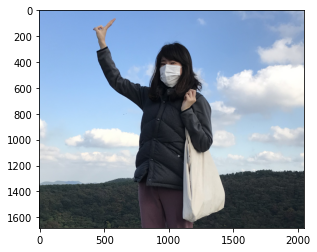

In [29]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/PARKNAHYUN RESIZED.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()


In [30]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. 
# model_dir 에 "/aiffel/human_segmentation/models" 저장

# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 
# "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장


# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 


# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 


# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 


# 다운로드를 시작합니다
# urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장
urllib.request.urlretrieve(model_url, model_file) 

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f7ee83eb280>)

In [31]:
#PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model = semantic_segmentation() 

# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file) 

In [32]:
# segmentAsPascalvoc()함수를 호출 하여 입력된 이미지를 분할, 
# 분할 출력의 배열을 가져옴, 분할은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model.segmentAsPascalvoc(img_path) 

In [33]:
#pascalvoc 데이터의 라벨종류

LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

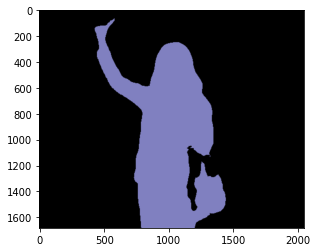

In [34]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력

plt.imshow(output)
plt.show()

In [35]:
# segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

segvalues 

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [36]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력

for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [49]:
#컬러맵 만들기 

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [50]:
#컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

colormap[15] 

array([192, 128, 128])

In [51]:
# 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

seg_color = (128,128,192) 

(1682, 2046)


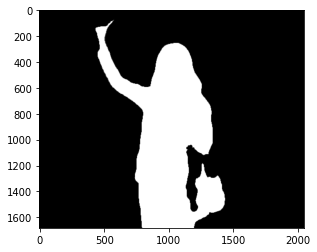

In [52]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함

seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

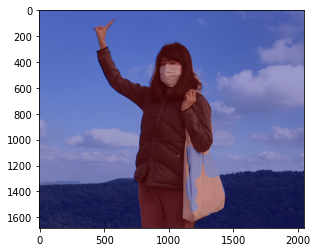

In [53]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 셸로우 포커스 만들기 배경 흐리게 하기

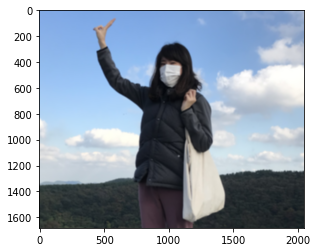

In [54]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

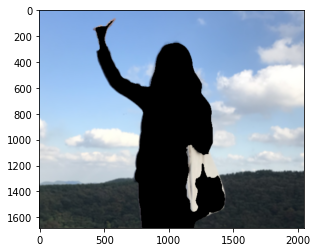

In [55]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

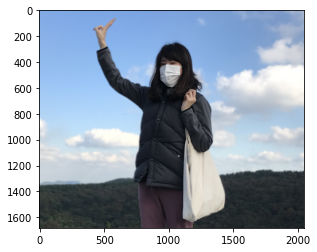

In [56]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### Step 2. 사진에서 문제점 찾기

1. 인물의 안경이 사람과 분리되지 않고 blur 처리되지 않았습니다.
2. 인물의 귀에 꼽혀있는 이어폰이 인물과 분리되지 않았고 blur 처리되지 않았습니다.

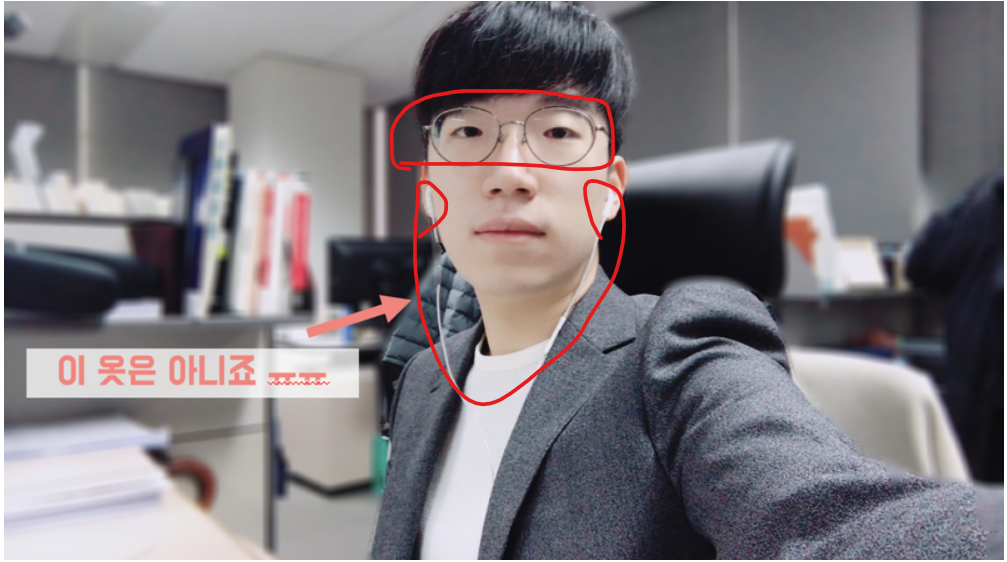

### Step 2.1 내가 만든 사진에서 문제점 찾기

1. 인물의 왼쪽 어깨에 걸려있는 가방이 인물과 분리되지 않고 blur 처리되지 않았습니다.

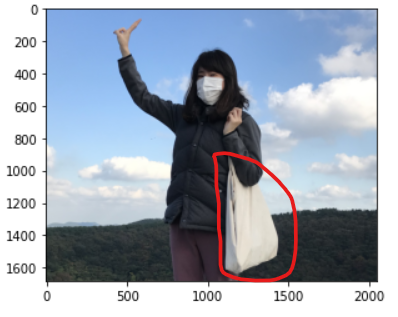

# Step 3. 해결 방법을 제안해 보기  

아주 간단히 멋진 카메라 앱 서비스를 만들어 출시할 수 있을 것 같았지만, 지금 같은 완성도로는 어림도 없습니다.  
소비자들의 눈높이는 그리 호락호락하지 않고, 엔지니어인 여러분들은 답을 찾아내야 합니다.

생각해 볼 만한 주제를 아래에 몇 가지 제시해 봅니다. 아래를 읽어본 후, 여러분이 만든 인물모드 사진의 문제점을 해결할 방안을 정리하여 제안해 주시기 바랍니다.  

단순히 'XXX 기술을 사용한다.' 정도의 선언적 솔루션이 아니라, 여러분들이 선택한 기술이 DeepLab 모델의 Semantic Segmentation 이 만들어 낸 Mask 영역에 어떻게 적용되어 문제점을 보완하게 되는지의 메커니즘이 포함된 솔루션이어야 합니다.

---

### 아래의 사항은 해결방법 제안입니다.
<br>

1. Semantic Segmentation 정확도 향상을 위한 Fine-tuning:

    DeepLab 모델의 Semantic Segmentation 결과물에 대해 추가적인 학습 데이터를 이용한 Fine-tuning을 진행하여 정확도를 향상시킵니다.  
<br><br>

2. 깊이 정보와의 통합을 통한 피사계심도 보정:

    3D 이미지 센서를 활용하여 얻은 깊이 정보를 Semantic Segmentation 결과물과 융합하여 피사계심도를 높여보케 효과를 개선합니다.  
    IR 카메라와의 협력을 통한 얼굴 인식 개선:
<br><br>

3. IR 카메라로 얼굴의 온도 분포를 파악하고, 이 정보를 Semantic Segmentation 결과에 적용하여 보다 정교한 얼굴 인식을 도출합니다.  
<br><br>

4. 사용자 피드백을 바탕으로 한 지속적인 모델 업데이트:  

     서비스 이용자들의 피드백을 수집하여 Semantic Segmentation 모델을 지속적으로 업데이트하여 사용자들의 눈높이에 부합하는 결과물을 제공합니다.
<br><br>

# 프로젝트 요약 보고서

**1. 프로젝트 개요**

주제: Semantic Segmentation을 이용한 인물 모드 구현  
사용된 라이브러리: cv2, pixellib, matplotlib  
프로젝트 목표: 딥러닝 기술을 활용하여 Semantic Segmentation을 통해 인물을 감지하고,   
인물을 제외한 배경을 흐리게 처리하는 인물 모드를 구현한다.  
<br>

**2. 프로젝트 진행 과정**

데이터 수집: 주어진 이미지 데이터를 이용하여 딥러닝 모델 학습을 위한 데이터를 확보한다.
모델 구현 및 학습: pixellib 라이브러리를 활용하여 DeepLab 모델을 로드하고,   
PASCAL VOC 데이터셋으로 미리 학습된 가중치를 이용하여 모델을 구현하고 학습시킨다.
모델 적용 및 후처리: 학습된 모델을 사용하여 주어진 이미지에 Semantic Segmentation을 수행하고, 인물과 배경을 분리한다. 
또한, 배경을 흐리게 처리하여 인물을 부각시킨다.  
<br>

**3. 프로젝트 결과**

Semantic Segmentation 결과: 딥러닝 모델을 통해 얻은 Semantic Segmentation 결과를 시각화하여 확인하였다.
인물 모드 구현 결과: 인물을 제외한 배경을 흐리게 처리하고, 인물을 강조한 이미지를 생성하였다.
<br><br>

### 주요 코드 리뷰

In [ ]:
# 모델 로드 및 Semantic Segmentation 수행
model = semantic_segmentation() 
model.load_pascalvoc_model(model_file) 
segvalues, output = model.segmentAsPascalvoc(img_path)

# Semantic Segmentation 결과 시각화
plt.imshow(output)
plt.show()

# 배경과의 합성을 위한 후처리
img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

# 인물 모드 결과 시각화
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


###  <조필선 프로젝트 회고록>
<br>


#### **성공한 점:**

딥러닝을 활용하여 Semantic Segmentation을 수행하고, 배경을 흐리게 처리하여 인물을 강조하는데 성공(?)한 것 같습니다.   
pixellib 라이브러리의 사용법을 익히고, 주어진 이미지에 대해 모델을 적용하는 과정에서 딥러닝 기술을 활용해 보았습니다.  
<br>

#### **어려웠던 점:**

사진의 적절한 사이즈 조정: 결과물을 더 보기 좋게 만들기 위해 사진의 사이즈를 조정하는 부분에서 어려움이 있었습니다.  
적절한 크기와 비율을 찾는 것이 중요하며, 이 부분에서 정확한 적용이 필요했습니다. 
그런데 생각대로 잘 안 되었던 점이 많이 아쉬웠습니다.

결과물 비교 기능 구현: 원본 사진과 결과물을 쉽게 비교할 수 있는 기능을 구현하는 데 어려움을 겪었습니다.   
원본 대비 결과를 명확하게 시각화하고 비교할 수 있는 방안을 찾는 것이 좀 어려웠던 것 같습니다.
<br>

#### **개선할 점:**

더 다양한 이미지에 대한 실험과 여러가지 기법과 기술들을 공부하여 적용해서 더 나은 결과물을 도출하도록 해볼 필요하다는 것을 느꼈습니다.  
<br>

#### **마무리 및 향후 계획**

프로젝트를 통해 딥러닝 기술을 활용한 Semantic Segmentation 및 후처리 기술을 익히는 경험을 쌓았습니다.   
앞으로는 다양한 프로젝트를 통해 실전 경험을 쌓아가고, 성능 향상을 위한 노력을 기울이도록 하겠습니다.  
아직까지 프로젝트 제출시에 루브릭 기준을 달성하지 못했지만 나름대로 재미있고 즐겁게 하려고 노력하는 중에 있습니다.

감사합니다.
<br><br>

In [ ]:
''' 

루브릭
아래의 기준을 바탕으로 프로젝트를 평가합니다.
평가문항	상세기준
1. 인물모드 사진을 성공적으로 제작하였다.	아웃포커싱 효과가 적용된 인물모드 사진과 동물 사진, 배경전환 크로마키사진을 각각 1장 이상 성공적으로 제작하였다.
2. 제작한 인물모드 사진들에서 나타나는 문제점을 정확히 지적하였다.	인물사진에서 발생한 문제점을 정확히 지적한 사진을 제출하였다.
3. 인물모드 사진의 문제점을 개선할 수 있는 솔루션을 적절히 제시하였다.	semantic segmentation mask의 오류를 보완할 수 있는 좋은 솔루션을 이유와 함께 제시하였다.

'''